In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\user\Downloads\USArrests.csv")

In [3]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [6]:
x = data[['Murder', 'Assault', 'UrbanPop', 'Rape']]

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,n_init=10)
    km.fit(x)
    css = km.inertia_
    wcss.append(css)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

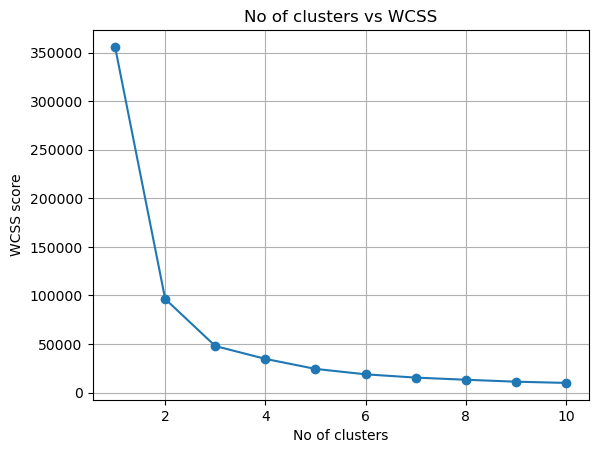

In [8]:
plt.plot(range(1,11),wcss,'o-')
plt.xlabel('No of clusters')
plt.ylabel('WCSS score')
plt.title('No of clusters vs WCSS')
plt.grid()
plt.show()

In [9]:
km = KMeans(n_clusters=3,n_init=10)

In [10]:
km.fit(x)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10)

In [11]:
cluster_labels = km.predict(x)


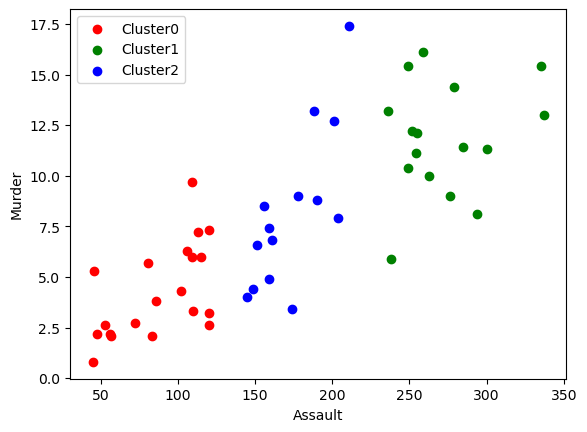

In [12]:
colors = ['r','g','b','c','m']
for i in range (max(cluster_labels)+1):
    cluster_data = x[cluster_labels==i]
    plt.scatter(cluster_data['Assault'],cluster_data['Murder'],c=colors[i],label = f'Cluster{i}')
    plt.xlabel('Assault')
    plt.ylabel('Murder')
    plt.legend()    